In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_music=pd.read_csv("../Data/cleaned_music_ds.csv")

## K Means Clustering Without Scaling

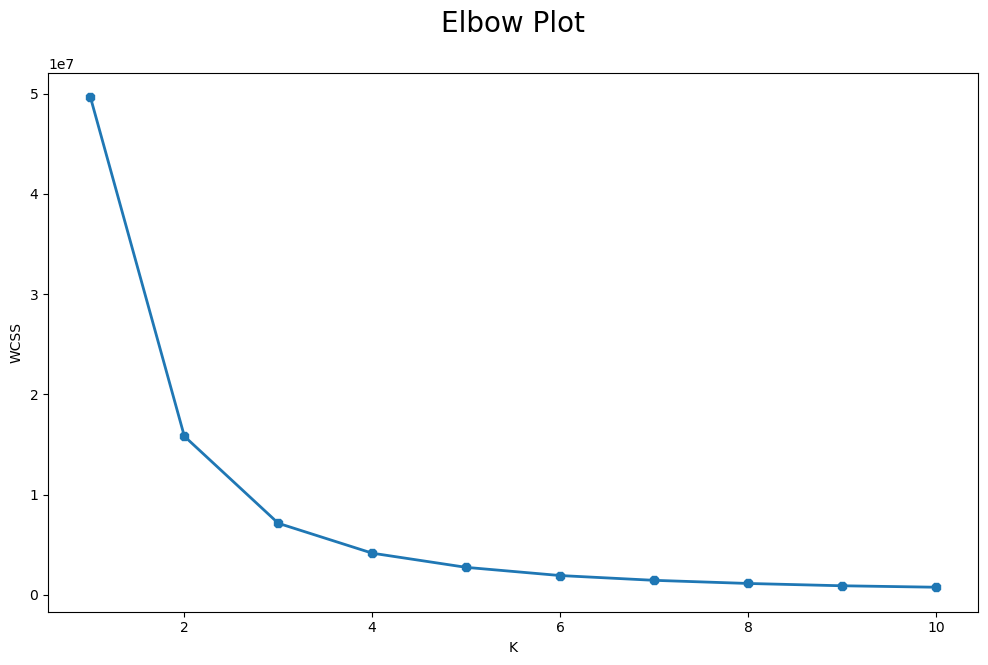

In [3]:
# create an elbow plot of WSS

X1 = df_music.loc[:,['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age']].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

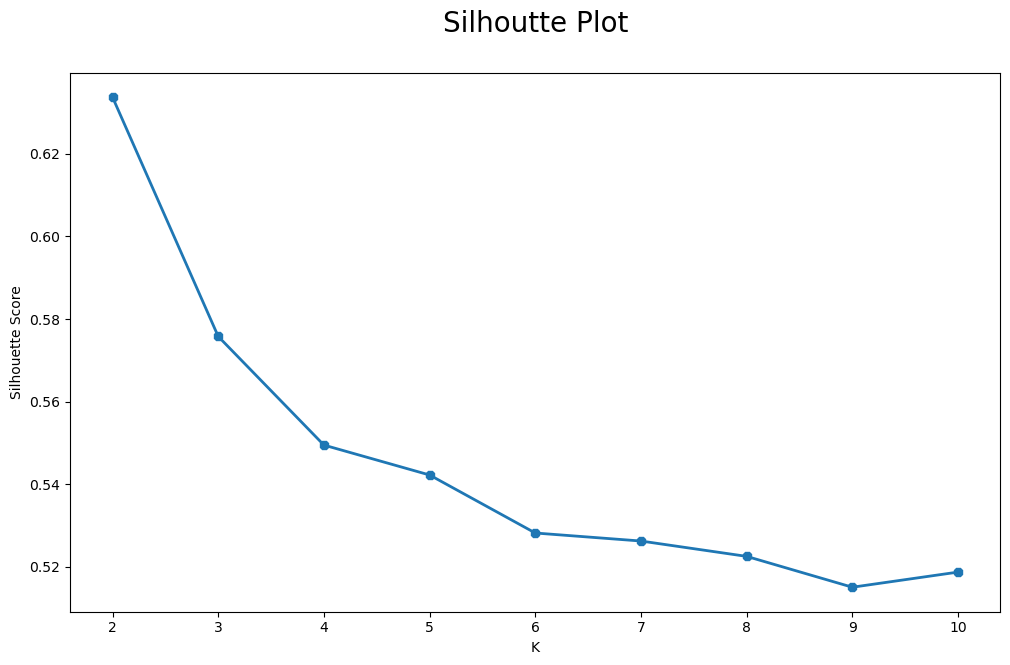

In [4]:
# Create a plot of Silhoutte Score

silhouette = []
for k in range(2, 11):
   #create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()



 ### The elbow plot and silhoutte plot optimal k is 2

In [16]:
#Create a KMeans object with this optimal number of clusters. Name this object `kmeans`
kmeans= KMeans(n_clusters=2)

#Fit KMeans object using ""X1" data
kmeans.fit(X1)

KMeans(n_clusters=2)

In [17]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[5.29924121e+01, 2.17534912e-02, 1.13505040e-01, 1.31135454e-01,
        6.06942439e-02, 1.55201939e-02, 1.70186481e-02, 5.66000389e-02,
        7.95630823e-02, 5.96265670e-02, 6.52186894e-02, 4.20633657e-02,
        5.15299786e-02, 2.40598178e-02, 1.46758508e-01, 3.17932280e-02,
        4.59339106e-01],
       [1.32544653e+02, 1.91976880e-02, 1.32823903e-01, 9.08333571e-02,
        4.74406661e-02, 2.30561879e-02, 1.71235455e-02, 2.51403559e-02,
        6.80002582e-02, 2.08737158e-01, 4.47651062e-02, 6.33167563e-02,
        4.15174281e-02, 2.44370294e-02, 7.78507190e-02, 2.86249254e-02,
        3.23598224e-01]])

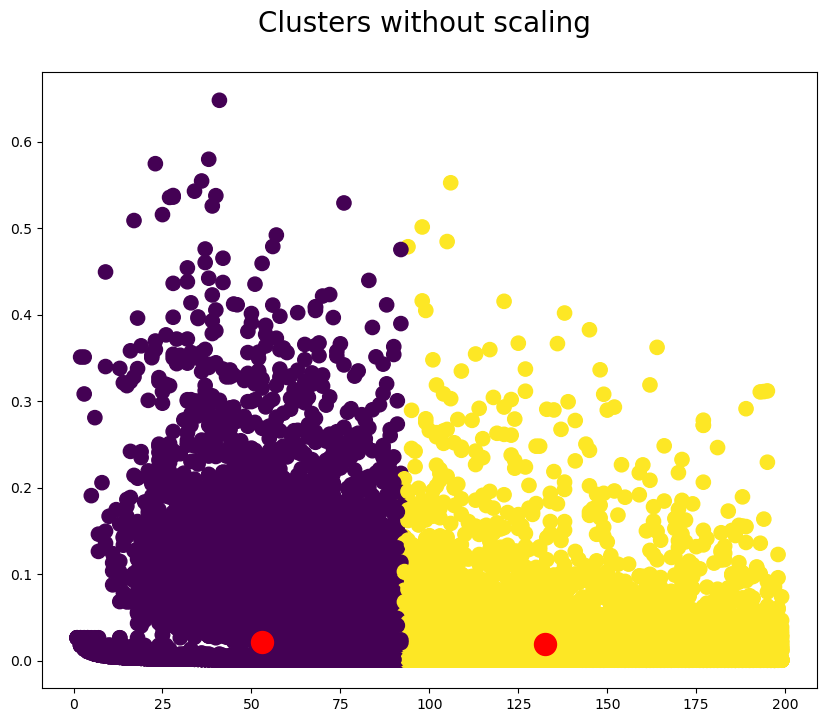

In [19]:
# view 2D clusters

plt.figure(figsize = (10, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters without scaling \n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# K Means Clustering  with Scaling

In [21]:
# create an Elbow Plot of WCSS on scaled values

# create and use the standard scaler object to ensure all variables have equal range

scaler = StandardScaler()

# fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)

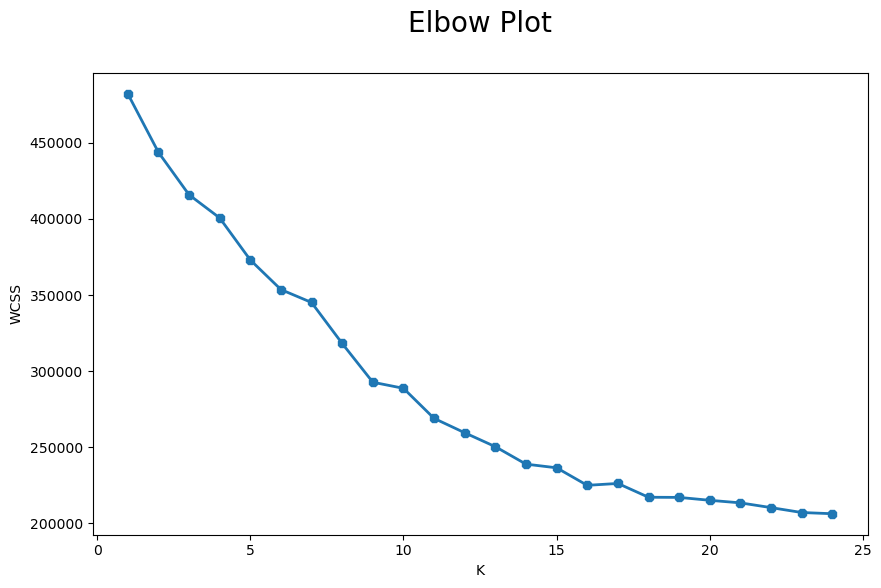

In [22]:
wcss_scaled = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')

    #Fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    #Append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))

plt.plot(range(1, 25), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show() 

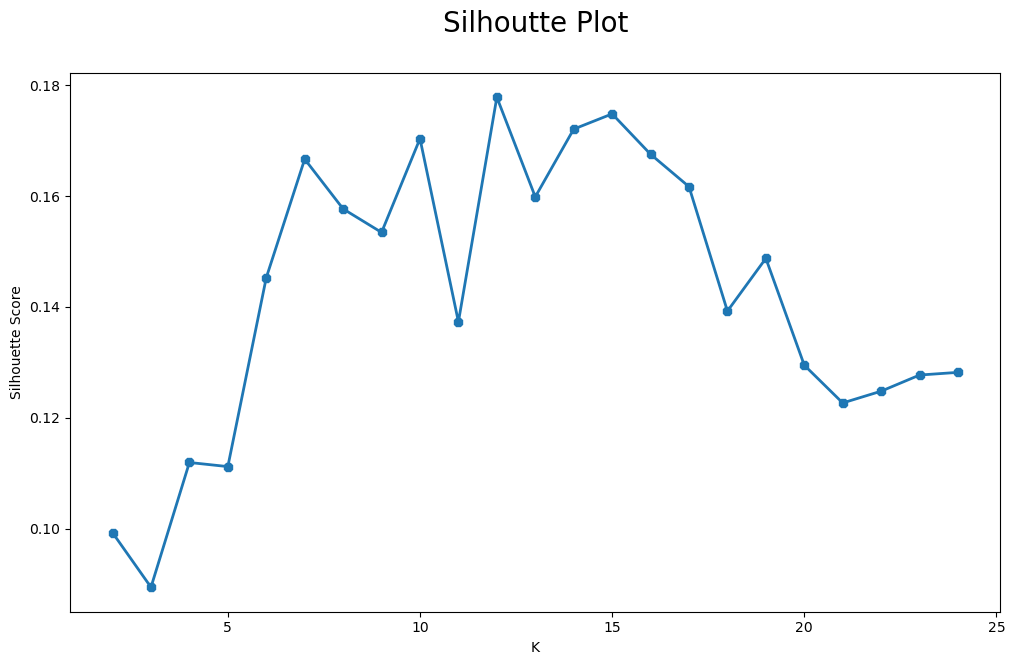

In [11]:
scaler = StandardScaler()

#Fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)


#Create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 25):
    # Create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans (n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 25), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

###                 The optimal k for both elbow plot and sihouette plot is 13

In [23]:
#Create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`

means_scaled = KMeans(n_clusters=13)

#Fit this KMeans object on your data

kmeans.fit_transform(X1_scaled)

array([[5.40813039, 5.00549051, 3.74221249, ..., 4.86276789, 3.80118354,
        7.42329098],
       [3.67004767, 3.8472625 , 4.75365778, ..., 4.62144369, 5.0195631 ,
        6.94527101],
       [5.09179006, 5.98739861, 5.74016305, ..., 4.19237536, 4.95542111,
        7.8451304 ],
       ...,
       [5.30771182, 2.88457199, 3.89686834, ..., 4.80784145, 4.04856268,
        7.1346886 ],
       [4.31160992, 4.36986334, 4.66531849, ..., 4.93636216, 5.06646266,
        7.58000062],
       [6.14321312, 4.93693659, 5.22257338, ..., 5.66590869, 5.35403683,
        7.83646375]])

In [24]:
#Generate labels for the  dataset

labels =  kmeans_scaled.fit_predict(X1_scaled)
labels

NameError: name 'kmeans_scaled' is not defined